# Simple geometry shape detection

In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
# Reading image
image = cv2.imread('shapes.png')

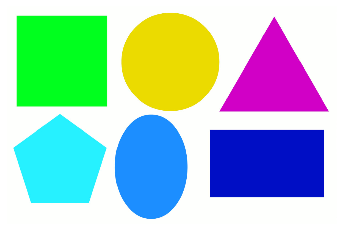

In [3]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [4]:
# function to plot image in grayscale
def implot(img):
    plt.axis("off")
    plt.imshow(gray, cmap='gray')
    plt.show()

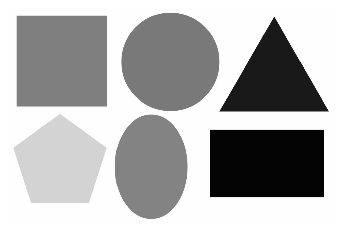

In [5]:
# Converting RGB to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
implot(gray)

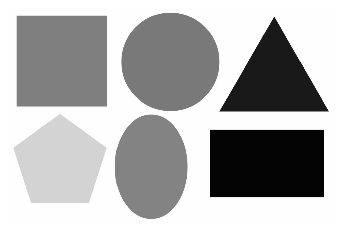

In [6]:
# Binarization of image
thresh = cv2.threshold(gray, 238, 255, cv2.THRESH_BINARY_INV)[1]
implot(thresh)

In [7]:
# Finding contours in binary image and grabbing the correct tuple value
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [8]:
# So, there are total 6 shapes, which we can verify from above plots
len(cnts)

6

In [9]:
# compute the center of the contour
def contour_center(cnt):
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (cX, cY)

In [10]:
# Detecting circle using area of contour
def detect_circle(cnt):
    ver = cnt[0][0]
    c_area = cv2.contourArea(cnt)
    center = contour_center(cnt)
    radius = ( (center[0]-ver[0])**2 + (center[1]-ver[1])**2 )**0.5
    area_calc = 3.14 * (radius**2)
    if area_calc > 0.9*c_area and area_calc < 1.1*c_area:
        return True
    return False

In [11]:
# We can check the no. of vertices from contour to compute shapes
# Example: If the contour has three verices,it is triangle

def detect(cnt, shape = 'unknown'):
    # perform contour approximation
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    
    if len(approx) == 3:
        # three vertics
        shape = "triangle"
        
    elif len(approx) == 4:
        # four vertices
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
            # aspect ratio is approx 1, then it is square
            shape = "square"
        else:
             shape = "rectangle"

    elif len(approx) == 5:
        # five vertices
        shape = "pentagon"

    else:
        if detect_circle(cnt):
            shape = "circle"
        else:
            shape ="ellipse"
        
    return shape

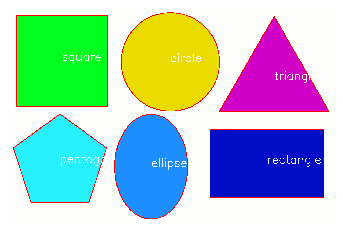

In [12]:
plt.axis("off")
for cnt in cnts:
    center = contour_center(cnt)
    shape = detect(cnt)
    cv2.drawContours(image, [cnt], -1, (255, 0, 0), 2)
    cv2.putText(image, shape, center,
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
    plt.imshow(image)

plt.show()

In [13]:
cv2.imwrite('shapes_detected.jpg', image)

True